# Продвинутая визуализация данных. Домашнее задание №3

#### Студент: Виноградов Егор.

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from itertools import combinations
from sklearn.preprocessing import LabelEncoder
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from itertools import combinations
from mpl_toolkits.mplot3d import Axes3D

In [2]:
apples = pd.read_csv('https://raw.githubusercontent.com/ElijahSum/mipt_visualization/master/week_03_visualization/apple_quality.csv')
apples.head()

A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0   0.0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840   
1   1.0 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2   2.0 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
3   3.0 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761   
4   4.0  1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849   

        Acidity Quality  
0  -0.491590483    good  
1  -0.722809367    good  
2   2.621636473     bad  
3   0.790723217    good  
4   0.501984036    good

# Задача 1. Сравнение качества работы kNN при разных параметрах k

На лекциях и семинарах мы разбирали возможности для применения стандартных библиотек при работе с алгоритмом kNN. Мы также обращали внимание, что существует большое количество кастомных библиотек для создания более тонкой и кастомной визуализации. Одна из них — библиотека mlxtend.plotting.

Эта библиотека позволяет создавать удобные визуализации работы алгоритмов машинного обучения. В ней есть функция plot_decision_regions, которая позволяет создавать визуализации для алгоритмов классификации.

### Задача 1.1 (2 балла)

#### Напишите функцию, которая будет:

1. Отбирать все числовые признаки в датасете.  
2. Перебирать все сочетания по два признака (без повторений) и запускать для каждой пары признаков алгоритм kNN (с k = 10). Для каждой итерации необходимо считать accuracy. Зависимая переменная  указывается отдельно при подаче в функцию.
3. Возвращает названия двух признаков, которые дали наибольший accuracy score. Если accuracy score совпадают для двух или нескольких пар, верните первую найденную вами пару.

Прототип может выглядеть примерно так:

```python
def knn_two_features(df, y):
  '''
  df - датасет, который мы подаем для перебора алгоритмов
  y - зависимая переменная (класс признаков), которую мы хотим предсказать
  '''

  ...

  return [first_feature, second_feature]
```

In [3]:
# Функция для выбора двух признаков, которые дают наилучшую точность в KNN
def knn_two_features(df, target_column):
    # Замена бесконечных значений на NaN
    df = df.replace([np.inf, -np.inf], np.nan)
    
    # Разделение столбцов на числовые и нечисловые
    num_cols = df.select_dtypes(include=['float64', 'int64']).columns
    not_num_cols = df.select_dtypes(exclude=['float64', 'int64']).columns
    
    # Заполнение пропущенных значений средним для числовых столбцов и преобразование нечисловых столбцов в строковый тип
    df[num_cols] = df[num_cols].fillna(df[num_cols].mean())
    df[not_num_cols] = df[not_num_cols].astype(str)
    
    # Получение списка числовых признаков, исключая целевой столбец
    num_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    if target_column in num_features:
        num_features.remove(target_column)
    
    # Инициализация переменных для хранения наилучшей точности и соответствующих признаков
    max_accuracy = -1
    best_features = None
    
    # Перебор всех возможных пар признаков
    for feature_pair in combinations(num_features, 2):
        # Создание наборов данных X и y
        X = df[list(feature_pair)]
        y = df[target_column]
        
        # Разделение данных на обучающую и тестовую выборки
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
       
        # Создание и обучение модели KNN
        model = KNeighborsClassifier(n_neighbors=10)
        model.fit(X_train, y_train)
        
        # Предсказание на тестовой выборке и вычисление точности
        y_pred = model.predict(X_test)
        current_accuracy = accuracy_score(y_test, y_pred)
        
        # Обновление наилучшей точности и соответствующих признаков
        if current_accuracy > max_accuracy:
            max_accuracy = current_accuracy
            best_features = feature_pair
    
    return best_features

In [4]:
for_task_1_1 = apples.copy()
best_features = knn_two_features(for_task_1_1, "Quality")
best_features

('Size', 'Sweetness')

### Задача 1.2 (2 балла)  

Мы получили два признака, которые вместе дают наибольший accuracy score. Теперь покрутите их, одновременно изменяя параметр k. С помощью plot_decision_regions библиотеки mlxtend.plotting постройте поле 3х3 из визуализаций результатов работы алгоритма kNN с разными параметрами k. Параметры k можно взять следующие: 1, 2, 5, 10, 15, 20, 30, 40, 50.

Подробнее о том, как работать с этой функцией, можно почитать в инструкции. Там же есть информация, как создать поле размером 3х3 для построения графиков.

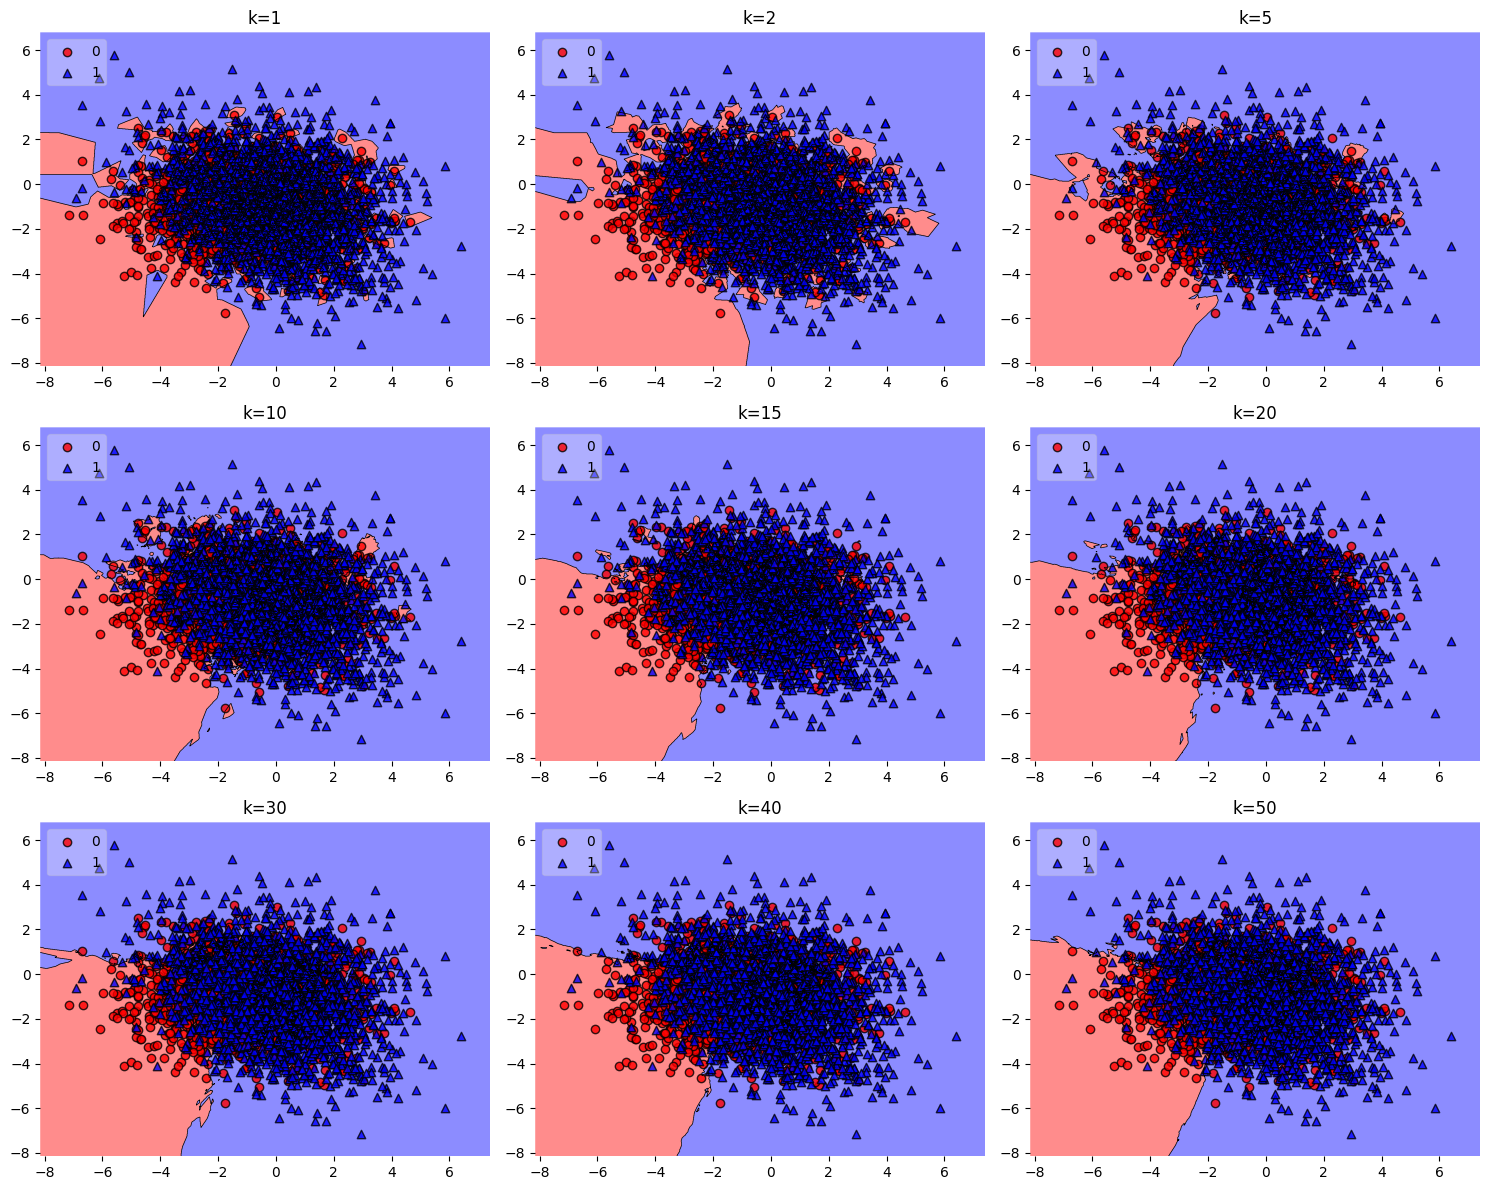

In [6]:
for_task_1_2 = apples.copy()
for_task_1_2.dropna(subset=['Quality'], inplace=True)
for_task_1_2.replace([np.inf, -np.inf], np.nan, inplace=True)

num_cols = for_task_1_2.select_dtypes(include=['float64', 'int64']).columns
for_task_1_2[num_cols] = for_task_1_2[num_cols].fillna(for_task_1_2[num_cols].mean())

not_num_cols = for_task_1_2.select_dtypes(exclude=['float64', 'int64']).columns
for_task_1_2[not_num_cols] = for_task_1_2[not_num_cols].astype(str)

X = for_task_1_2[['Size', 'Weight']].values
y = LabelEncoder().fit_transform(for_task_1_2['Quality'])

k_values = [1, 2, 5, 10, 15, 20, 30, 40, 50]

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for idx, k in enumerate(k_values):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X, y)
    ax = axes[idx]
    plot_decision_regions(X, y, clf=model, ax=ax, legend=2, markers='o^s', colors='red,blue,lightgreen')
    ax.set_title(f'k={k}')

plt.tight_layout()
plt.show()

### Задача 1.3 (1 балл)

Функция plot_decision_regions удобна тем, что ее можно использовать для визуализации разных алгоритмов классификации.

- Выберите два параметра, которые кажутся вам наиболее важными при оценке качества яблок. Используйте их, чтобы построить алгоритм решающего дерева.
- Также постройте решающее дерево для признаков, которые были отобраны в пункте 1.1.
- Создайте поле 1х2 и визуализируйте полученные результаты. Каждый график озаглавьте.

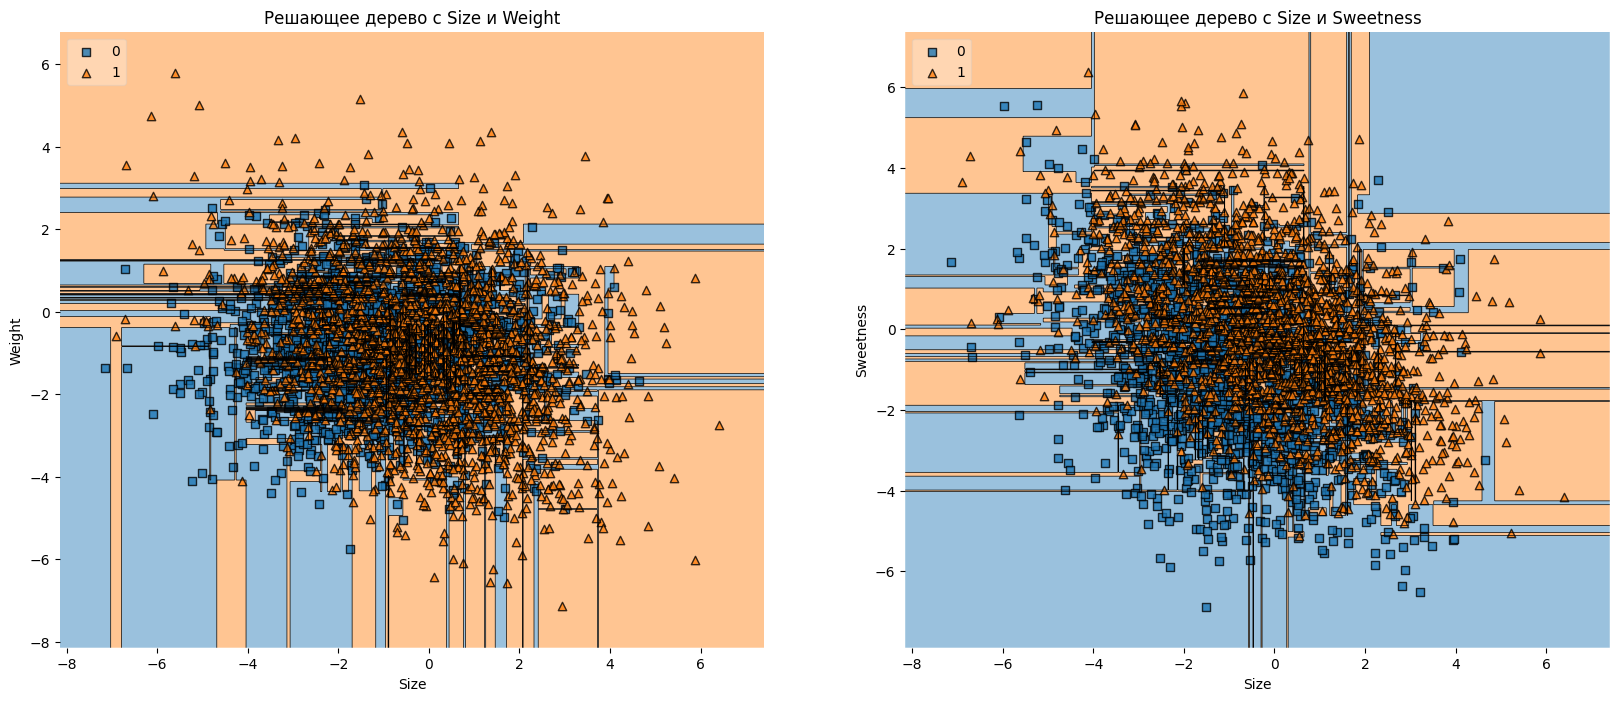

In [7]:
for_task_1_3 = apples.copy()

for_task_1_3.dropna(subset=['Quality'], inplace=True)
for_task_1_3.replace([np.inf, -np.inf], np.nan, inplace=True)

num_cols = for_task_1_3.select_dtypes(include=['float64', 'int64']).columns
for_task_1_3[num_cols] = for_task_1_3[num_cols].fillna(for_task_1_3[num_cols].mean())

not_num_cols = for_task_1_3.select_dtypes(exclude=['float64', 'int64']).columns
for_task_1_3[not_num_cols] = for_task_1_3[not_num_cols].astype(str)

for_task_1_3['Quality'] = for_task_1_3['Quality'].map({'good': 1, 'bad': 0})

X1 = for_task_1_3[['Size', 'Weight']].values
X2 = for_task_1_3[['Size', 'Sweetness']].values
y = for_task_1_3['Quality'].values

clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()

clf1.fit(X1, y)
clf2.fit(X2, y)

fig, ax = plt.subplots(1, 2, figsize=(20, 8))

plot_decision_regions(X1, y, clf=clf1, legend=2, ax=ax[0])
ax[0].set_ylabel('Weight')
ax[0].set_xlabel('Size')
ax[0].set_title('Решающее дерево с Size и Weight')

plot_decision_regions(X2, y, clf=clf2, legend=2, ax=ax[1])
ax[1].set_ylabel('Sweetness')
ax[1].set_xlabel('Size')
ax[1].set_title('Решающее дерево с Size и Sweetness')

plt.show()

# Задача 2. Визуализация алгоритмов решающего дерева

### Задача 2.1 (1 балл)

Аналогично пункту 1.1, создайте две функции для алгоритмов решающего дерева:

- Функцию, которая возвращает два параметра, дающие наибольший accuracy score при применении алгоритма решающего дерева.
- Такую же функцию, но которая возвращает три параметра (то есть перебирает все значения не по парам признаков, а по тройкам).

In [10]:
# Функция, которая возвращает два параметра, дающие наибольший accuracy score при применении алгоритма решающего дерева.
def best_two_features(df, target):
    features = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity'] 

    best_score = 0
    best_features = None
    
    for combo in combinations(features, 2):
        X = df[list(combo)].values
        y = df[target].values
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
        
        clf = DecisionTreeClassifier(random_state=42)
        clf.fit(X_train, y_train)

        predictions = clf.predict(X_test)
        score = accuracy_score(y_test, predictions)
        
        if score > best_score:
            best_score = score
            best_features = combo
            
    return best_features, best_score

In [11]:
# Функция, которая возвращает три параметра (то есть перебирает все значения не по парам признаков, а по тройкам).
def best_three_features(df, target):
    features = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']

    best_score = 0
    best_features = None
    
    for combo in combinations(features, 3):
        X = df[list(combo)].values
        y = df[target].values
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
        
        clf = DecisionTreeClassifier(random_state=42)
        clf.fit(X_train, y_train)
        
        predictions = clf.predict(X_test)
        score = accuracy_score(y_test, predictions)
        
        if score > best_score:
            best_score = score
            best_features = combo
            
    return best_features, best_score

In [8]:
# Предобработка
for_task_2_1 = apples.copy()

for_task_2_1.dropna(subset=['Quality'], inplace=True)
for_task_2_1.replace([np.inf, -np.inf], np.nan, inplace=True)

num_cols = for_task_2_1.select_dtypes(include=['float64', 'int64']).columns
for_task_2_1[num_cols] = for_task_2_1[num_cols].fillna(for_task_2_1[num_cols].mean())

not_num_cols = for_task_2_1.select_dtypes(exclude=['float64', 'int64']).columns
for_task_2_1[not_num_cols] = for_task_2_1[not_num_cols].astype(str)

for_task_2_1['Quality_label'] = for_task_2_1['Quality'].map({'good': 1, 'bad': 0})

In [12]:
best_2_features, best_2_score = best_two_features(for_task_2_1, 'Quality_label')
best_2_features, best_2_score

(('Crunchiness', 'Juiciness'), 0.6091666666666666)

In [13]:
best_3_features, best_3_score = best_three_features(for_task_2_1, 'Quality_label')
best_3_features, best_3_score

(('Size', 'Sweetness', 'Ripeness'), 0.7008333333333333)

### Задача 2.2 (1 балл)

Создайте три различных двумерных графика для визуализации результатов работы алгоритма случайного леса (из пункта 1 задачи 2.1). Можете использовать любые библиотеки (включая модули graphviz, dtreeviz).

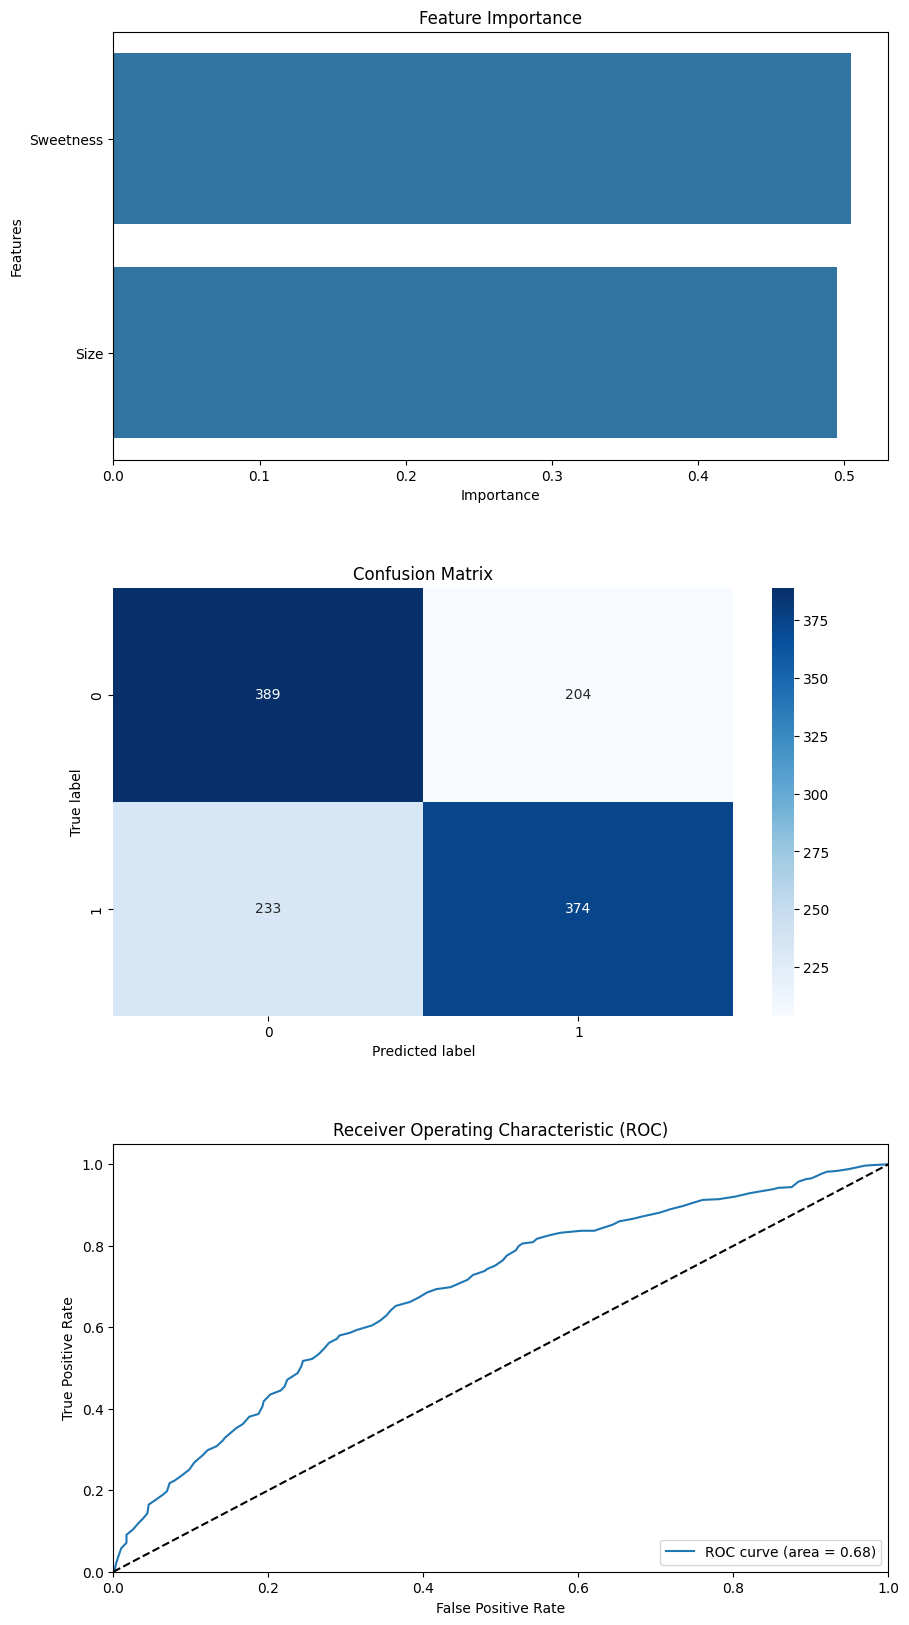

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc

for_task_2_2 = for_task_2_1

X = for_task_2_1[['Size', 'Sweetness']].values
y = for_task_2_2['Quality_label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
clf_rf.fit(X_train, y_train)

y_pred = clf_rf.predict(X_test)
y_pred_proba = clf_rf.predict_proba(X_test)[:, 1]

feature_importances = clf_rf.feature_importances_

conf_matrix = confusion_matrix(y_test, y_pred)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

features = ['Size', 'Sweetness']
importance_df = pd.DataFrame({'Features': features, 'Importance': feature_importances})

fig, axs = plt.subplots(3, 1, figsize=(10, 20))

# График важности признаков
sns.barplot(x='Importance', y='Features', data=importance_df.sort_values(by='Importance', ascending=False), ax=axs[0])
axs[0].set_title('Feature Importance')

# График матрицы ошибок
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", ax=axs[1])
axs[1].set_title('Confusion Matrix')
axs[1].set_xlabel('Predicted label')
axs[1].set_ylabel('True label')

# График ROC-кривой
axs[2].plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
axs[2].plot([0, 1], [0, 1], 'k--')  # random predictions curve
axs[2].set_xlim([0.0, 1.0])
axs[2].set_ylim([0.0, 1.05])
axs[2].set_xlabel('False Positive Rate')
axs[2].set_ylabel('True Positive Rate')
axs[2].set_title('Receiver Operating Characteristic (ROC)')
axs[2].legend(loc="lower right")

plt.subplots_adjust(hspace = 0.3)
plt.show()


In [34]:
from sklearn.tree import export_graphviz
import graphviz

estimator = clf_rf.estimators_[0]

export_graphviz(estimator, out_file='decision_tree.dot', feature_names=['Size', 'Sweetness'],  
                class_names=["good", "bad"], rounded=True, proportion=True, precision=2, filled=True)

with open('decision_tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph).render('decision_tree', format='svg')  

'decision_tree.svg'

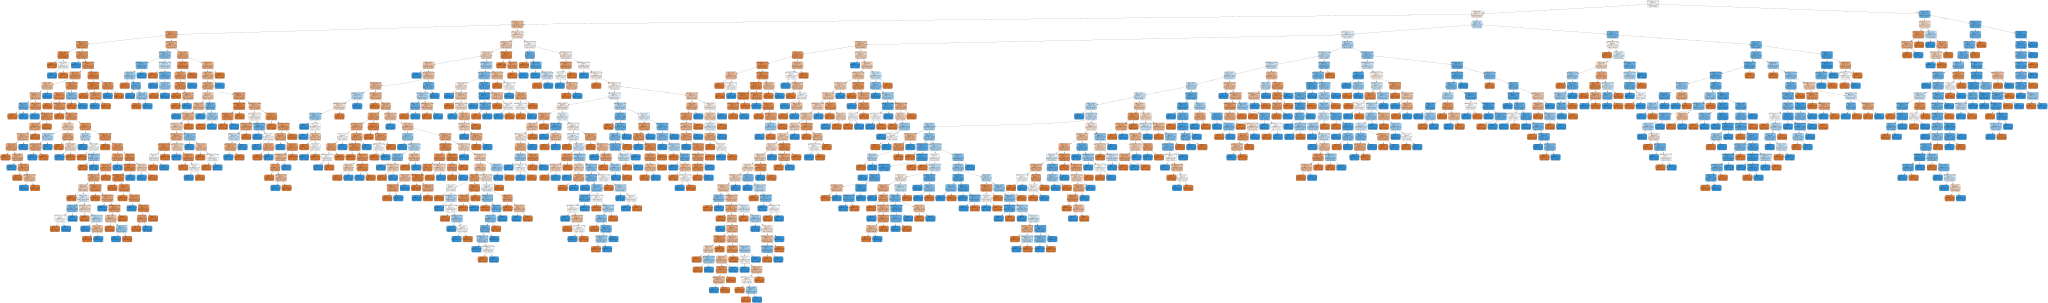

In [35]:
from IPython.core.display import SVG
SVG(filename='decision_tree.svg')

### Задача 2.3 (1 балл)

Аналогично предыдущему пункту, создайте три трехмерных графика (или псевдотрехмерных — двумерных, где цветом отображено третье измерение) для того алгоритма случайного леса с тремя параметрами, который вы получили во втором пункте задачи 2.1.

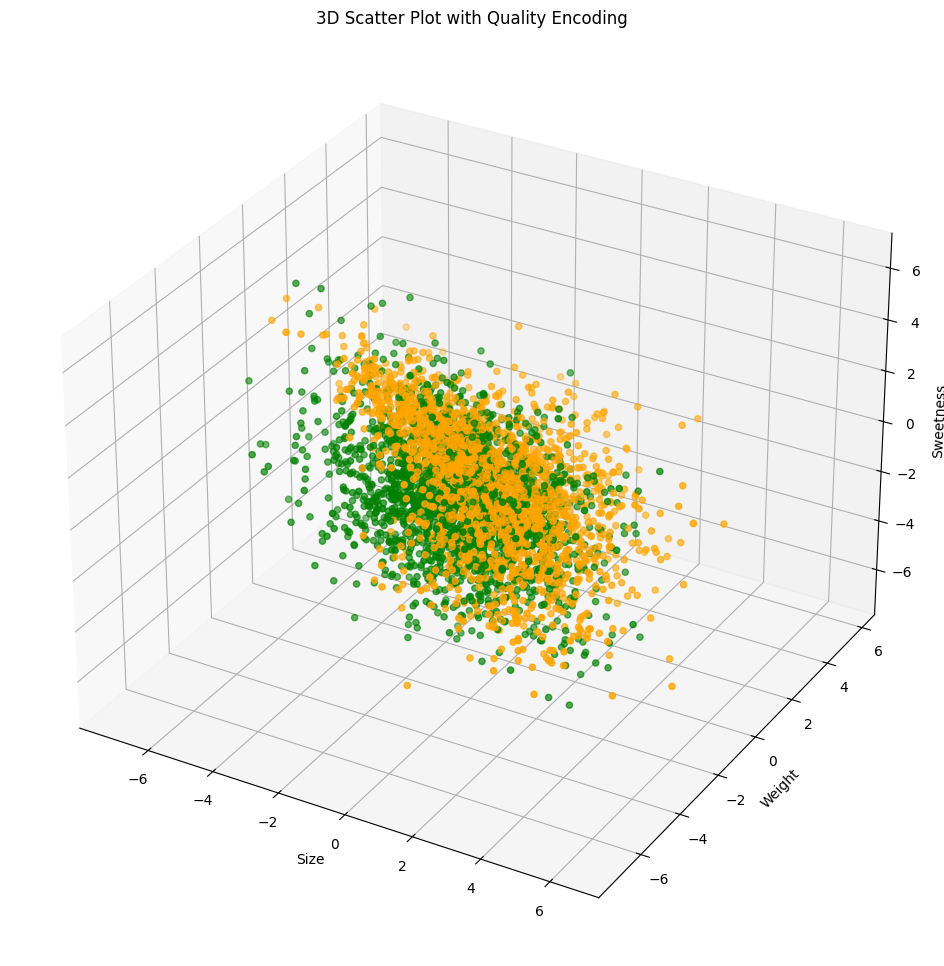

In [16]:
# Извлекаем данные для трехмерного графика

for_task_2_3 = for_task_2_2
X_3d_data = for_task_2_3[['Size', 'Weight', 'Sweetness']].values  
y_3d_labels = for_task_2_3['Quality_label'].values 

# Создаем новый график
fig_3d = plt.figure(figsize=(20, 12))
ax_3d = fig_3d.add_subplot(111, projection='3d')

# Определяем цвета для меток
color_scheme = ['orange' if label == 1 else 'green' for label in y_3d_labels]

# Добавляем точки на график
ax_3d.scatter(X_3d_data[:, 0], X_3d_data[:, 1], X_3d_data[:, 2], c=color_scheme, marker='o', depthshade=True)

ax_3d.set_xlabel('Size')
ax_3d.set_ylabel('Weight')
ax_3d.set_zlabel('Sweetness')
ax_3d.set_title('3D Scatter Plot with Quality Encoding')

plt.show()

# Задача 3. Градиентный спуск для функции одной переменной (2 балла)

На занятиях мы разбирали создание визуализации алгоритмов градиентного спуска. Напишите с нуля свой алгоритм градиентного спуска. Создайте визуализацию работы градиентного спуска на каждой итерации для следующей функции:

$ f(x) = x^6 - 3x^4 + 2x^2 + 1 $

Визуализацию снабдите названием, подписями к осям, а также добавьте текст с номером итерации (цвет выбирайте в зависимости от читаемости). Положение точки градиентного спуска на итерации n можно изобразить в качестве Scatter plot или Line plot.

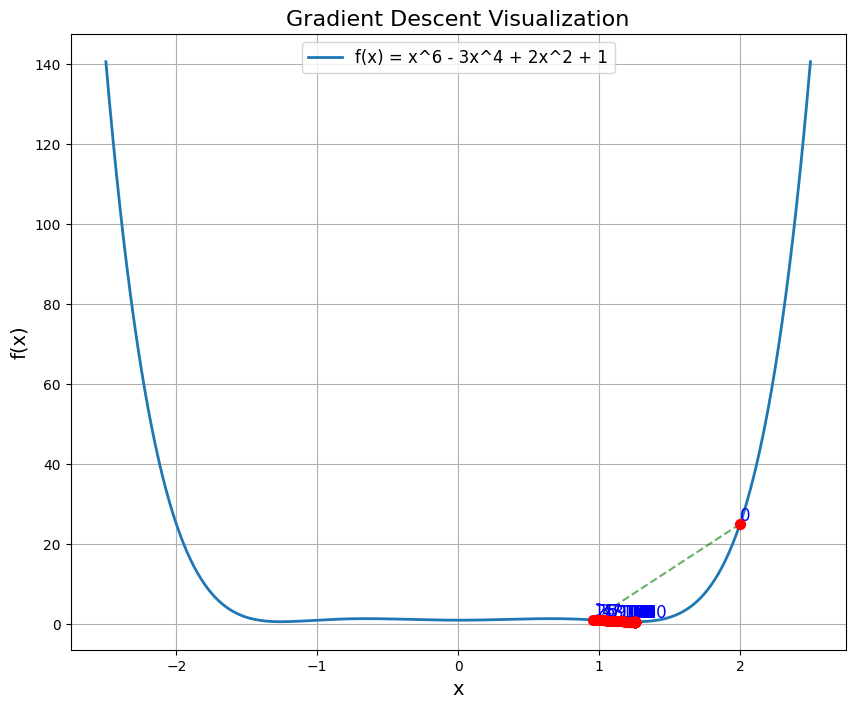

In [17]:
# Определение функции и ее градиента
func = lambda x: x ** 6 - 3 * x ** 4 + 2 * x ** 2 + 1
grad_func = lambda x: 6 * x ** 5 - 12 * x ** 3 + 4 * x

def perform_gradient_descent(initial_x, step_size, iterations):
    x = initial_x
    path = [(x, func(x))]
    for _ in range(iterations):
        gradient = grad_func(x)
        x = x - step_size * gradient
        path.append((x, func(x)))
    return path

# Параметры градиентного спуска
initial_x = 2
step_size = 0.01
iterations = 100

# Выполнение градиентного спуска
path = perform_gradient_descent(initial_x, step_size, iterations)

# Визуализация
x_range = np.linspace(-2.5, 2.5, 400)
y_range = func(x_range)

plt.figure(figsize=(10, 8))
plt.plot(x_range, y_range, label='f(x) = x^6 - 3x^4 + 2x^2 + 1', linewidth=2)
plt.scatter(*zip(*path), color='red', s=50, zorder=5)

# Добавление линий для показа перемещения точки
for i in range(1, len(path)):
    plt.plot(*zip(path[i-1], path[i]), color='green', linestyle='--', alpha=0.6)

# Добавление текста с номером итерации
for i, (x, y) in enumerate(path):
    plt.text(x, y, str(i), color='blue', fontsize=12, va='bottom', ha='left')

plt.title('Gradient Descent Visualization', fontsize=16)
plt.xlabel('x', fontsize=14)
plt.ylabel('f(x)', fontsize=14)
plt.grid(True)
plt.legend(fontsize=12)
plt.show()

# Задача 4. Визуализация градиентного спуска для трехмерной функции (4 балла)

В теории оптимизации есть достаточно известная функция Розенброка. Она используется для проверки производительности алгоритмов.

Постройте трехмерную визуализацию (plt.surface() или ее двумерные аналоги, например, plt.contourf()), работы градиентного спуска для функции Розенброка:

$ f(x) = (1 - x_1)^2 + 100(x_2 - x_1^2)^2 $

В качестве визуализации текущего расположения градиентного спуска лучше использовать линейный график красного цвета, чтобы отследить блуждания функции в трехмерном пространстве. Визуализацию снабдите названием, подписями к осям, а также добавьте текст с номером итерации (цвет выбирайте в зависимости от читаемости). Положение точки градиентного спуска на итерации n лучше изобразить через Line plot.

Пример работы plt.contourf():
```python
x = np.arange(1, 10)
y = x.reshape(-1, 1)
h = x * y

fig, (ax1, ax2) = plt.subplots(ncols=2)

ax1.set_title("origin='upper'")
ax2.set_title("origin='lower'")
ax1.contourf(h, levels=np.arange(5, 70, 5), extend='both', origin="upper")
cs2 = ax2.contourf(h, levels=np.arange(5, 70, 5), extend='both', origin="lower")
fig.colorbar(cs2, ax=ax2, shrink=0.9)

plt.show()
```

![](https://lms.skillfactory.ru/asset-v1:SkillFactory+MFTIDS+SEP2023+type@asset+block@PVD_hw_3.png)

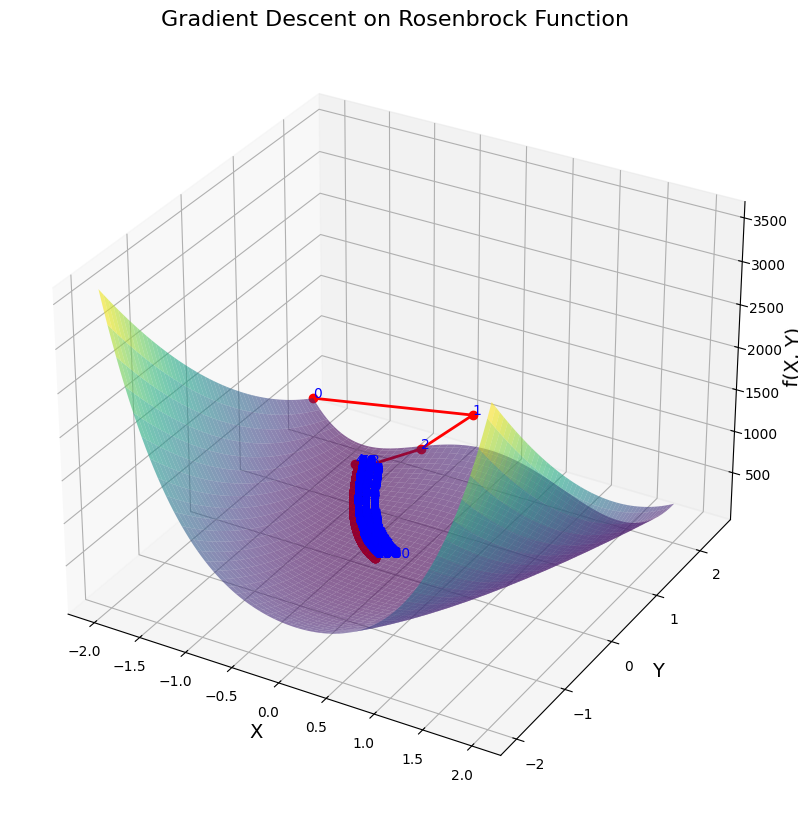

In [18]:
# Определение функции Розенброка и её градиента
def rosenbrock_func(x, y):
    return (1 - x)**2 + 100 * (y - x**2)**2

def rosenbrock_grad(x, y):
    dx = -2 * (1 - x) - 400 * x * (y - x**2)
    dy = 200 * (y - x**2)
    return dx, dy

def perform_gradient_descent(init_x, init_y, lr, num_iter):
    x, y = init_x, init_y
    path = [(x, y, rosenbrock_func(x, y))]
    for _ in range(num_iter):
        dx, dy = rosenbrock_grad(x, y)
        x -= lr * dx
        y -= lr * dy
        path.append((x, y, rosenbrock_func(x, y)))
    return np.array(path)

# Параметры градиентного спуска
init_x, init_y = -2, 2
lr = 0.001
num_iter = 1000

# Выполнение градиентного спуска
path = perform_gradient_descent(init_x, init_y, lr, num_iter)

# Визуализация
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Создание сетки для отображения поверхности
x_vals = np.linspace(-2, 2, 100)
y_vals = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = rosenbrock_func(X, Y)

# Построение поверхности
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.6)
ax.set_title('Gradient Descent on Rosenbrock Function', fontsize=16)
ax.set_xlabel('X', fontsize=14)
ax.set_ylabel('Y', fontsize=14)
ax.set_zlabel('f(X, Y)', fontsize=14)

# Добавление градиентного спуска
ax.plot(path[:, 0], path[:, 1], path[:, 2], color='red', linewidth=2, marker='o')

# Добавление текста с номером итерации
for i, (x, y, z) in enumerate(path):
    ax.text(x, y, z, str(i), color='blue', fontsize=10)

plt.show()